In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import io
%cd "C:\Users\Sanja\OneDrive\Desktop\Hr"

C:\Users\Sanja\OneDrive\Desktop\Hr


In [3]:
train=pd.read_csv("Train Hr Analytics.csv")
test=pd.read_csv("Test Hr Analytics.csv")

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [6]:
# Temporarily add dependent variable to test data

test['is_promoted']='test'

In [7]:
# concat both the dataframes for preprocessing

combinedf=pd.concat([train,test],axis=0)

In [8]:
combinedf.isnull().sum().sort_values(ascending=False)

previous_year_rating    5936
education               3443
employee_id                0
department                 0
region                     0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [9]:
combinedf.education.value_counts(dropna=False)

Bachelor's          52247
Master's & above    21429
NaN                  3443
Below Secondary      1179
Name: education, dtype: int64

In [10]:
combinedf.education=combinedf.education.fillna("Bachelor's")

In [11]:
combinedf.previous_year_rating.value_counts(dropna=False)

3.0    26539
5.0    16838
4.0    14126
1.0     8903
2.0     5956
NaN     5936
Name: previous_year_rating, dtype: int64

In [12]:
combinedf.previous_year_rating=combinedf.previous_year_rating.fillna(3.0)

In [13]:
# split back to train and test for EDA - EDA must only done on train data

hr_train=combinedf[combinedf.is_promoted!='test']
hr_test=combinedf[combinedf.is_promoted=='test']

##### Exploratory Data Analysis

In [14]:
# How many employees got promoted. Create pie Chart
# How many male and female employees are there. Create Pie chart
# How many employees won awards? Create Pie chart
# How many employees met KPI's? Create Pie Chart

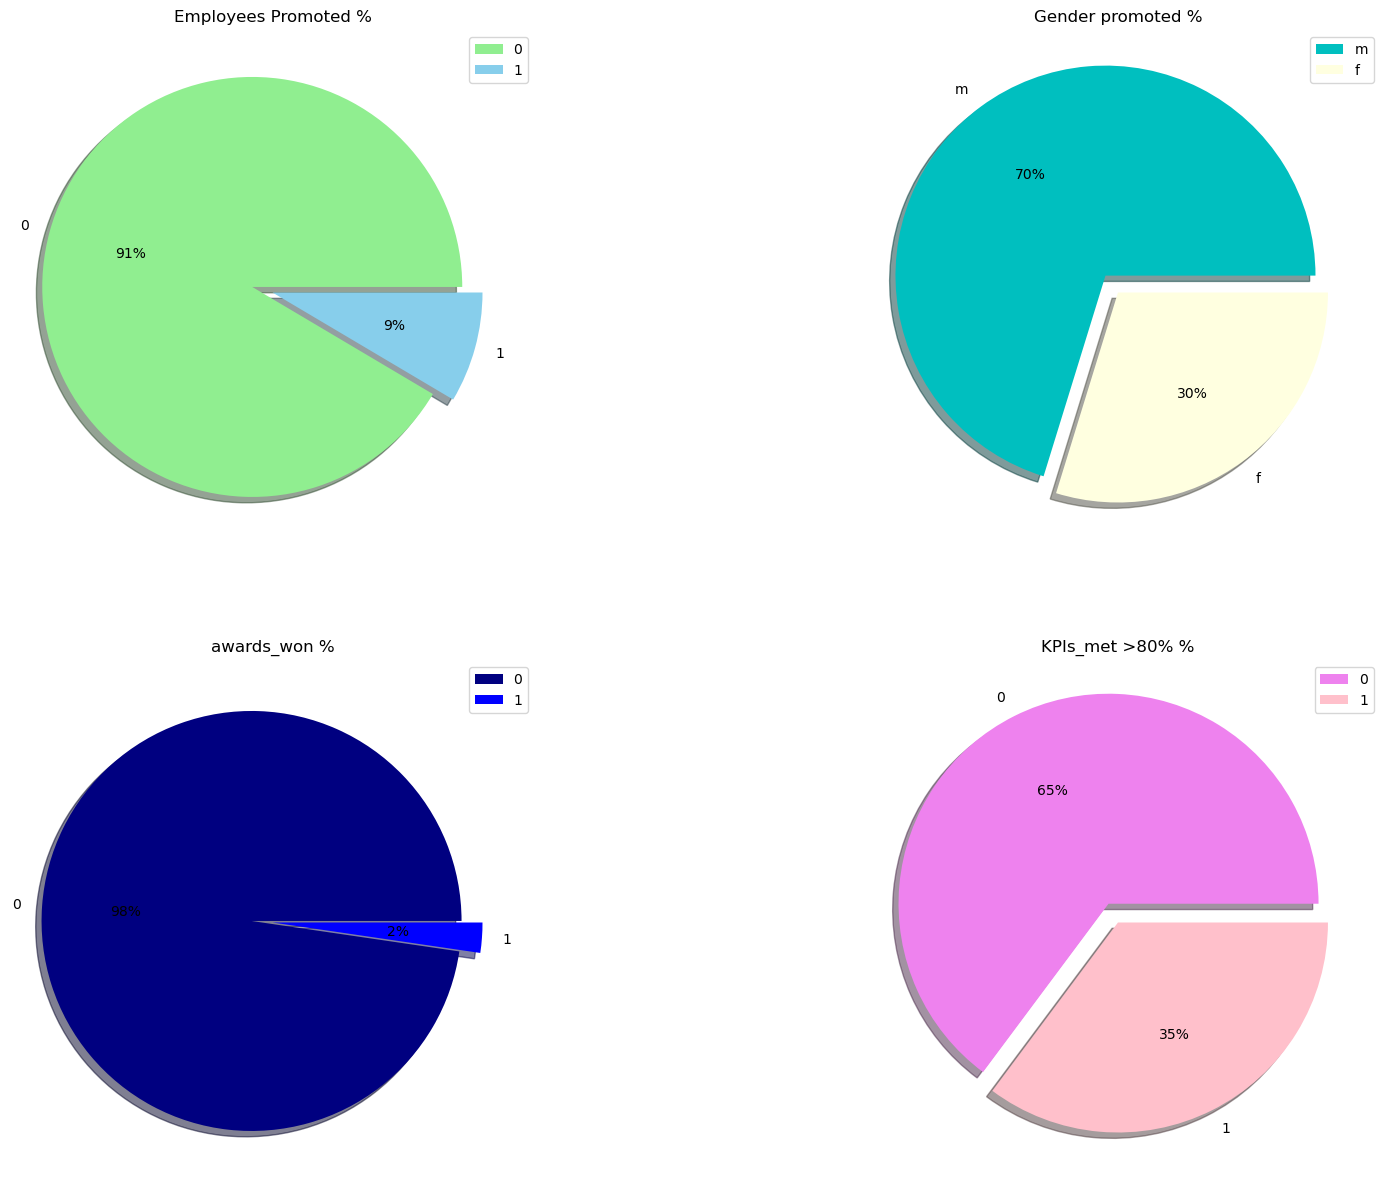

In [15]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.pie(hr_train.is_promoted.value_counts(),autopct='%.f%%',
       labels=hr_train.is_promoted.value_counts().index,colors=['lightgreen','skyblue'],
       explode=[0.1,0],shadow=True)

plt.title('Employees Promoted %')
plt.legend(loc='upper right')

plt.subplot(2,2,2)
plt.pie(hr_train.gender.value_counts(),autopct='%.f%%',
       labels=hr_train.gender.value_counts().index,colors=['c','lightyellow'],
       explode=[0.1,0],shadow=True)

plt.title('Gender promoted %')
plt.legend(loc='upper right')

plt.subplot(2,2,3)
plt.pie(hr_train['awards_won?'].value_counts(),autopct='%.f%%',
       labels=hr_train['awards_won?'].value_counts().index,colors=['navy','blue'],
       explode=[0.1,0],shadow=True)
plt.title('awards_won %')
plt.legend(loc='upper right')


plt.subplot(2,2,4)
plt.pie(hr_train['KPIs_met >80%'].value_counts(),autopct='%.f%%',
       labels=hr_train['KPIs_met >80%'].value_counts().index,colors=['violet','pink'],
       explode=[0.1,0],shadow=True)

plt.title('KPIs_met >80% %')
plt.legend(loc='upper right')


In [16]:
# Cross Tabulations - Stacked Bar plot
# How many male & female employees got promoted
# How many employees who won awards got promoted
# How many employees in each department got promoted
# How many employees got promoted with relation to education

<Figure size 3000x1000 with 0 Axes>

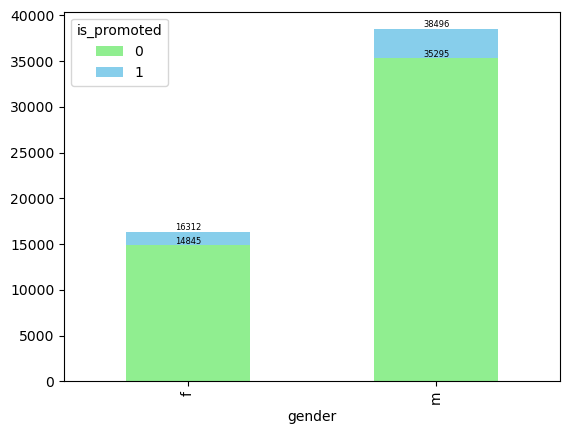

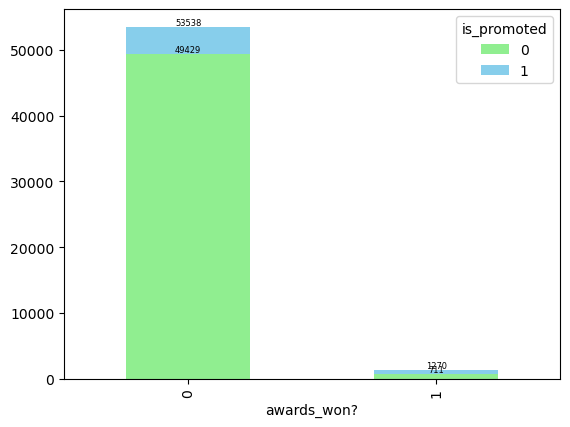

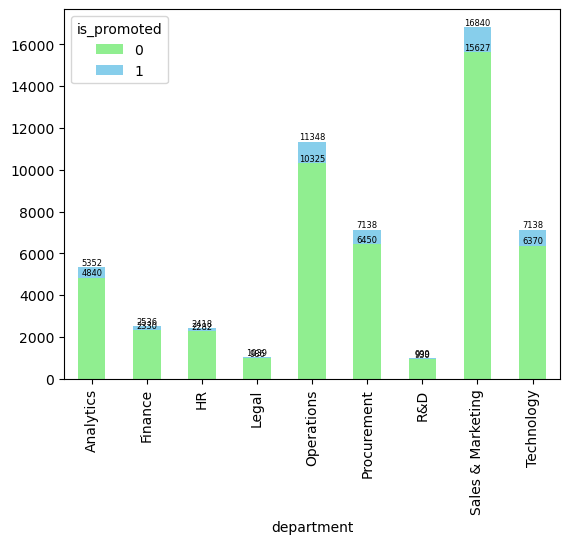

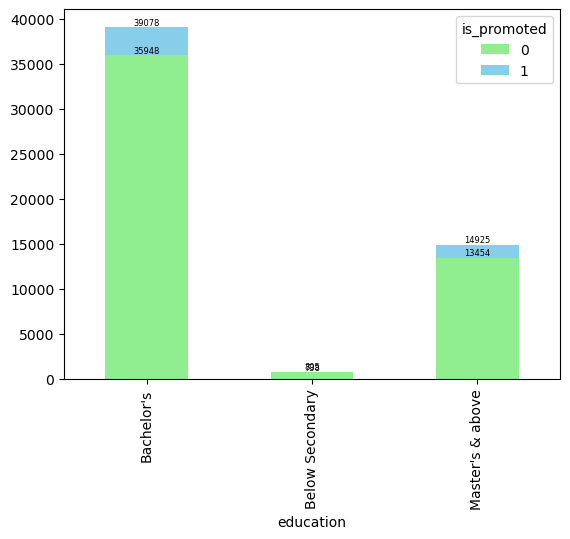

In [17]:

plt.figure(figsize=(30,10))
ax=pd.crosstab(
    hr_train.gender,hr_train.is_promoted).plot(
    kind='bar', stacked=True, color=['lightgreen','skyblue'])
    
for i in ax.containers:
    ax.bar_label(i,fontsize=6)
    
    
ax=pd.crosstab(
    hr_train['awards_won?'],hr_train.is_promoted).plot(
    kind='bar', stacked=True, color=['lightgreen','skyblue'])
    
for i in ax.containers:
    ax.bar_label(i,fontsize=6)

    
ax=pd.crosstab(
    hr_train.department,hr_train.is_promoted).plot(
    kind='bar', stacked=True, color=['lightgreen','skyblue'])
    
for i in ax.containers:
    ax.bar_label(i,fontsize=6)

    
ax=pd.crosstab(
    hr_train.education,hr_train.is_promoted).plot(
    kind='bar', stacked=True, color=['lightgreen','skyblue'])
    
for i in ax.containers:
    ax.bar_label(i,fontsize=6)

##### Hypothesis Testing

In [18]:
# What is the Average avg_training_score of is_promoted 0 & 1?
# What is the Average length_of_service of is_promoted 0 & 1?
# What is the Average avg_training_score of male and female ?
# What is the Average length_of_service of male and female ?
# What is the Average avg_training_score of different departments?
# What is the Average length_of_service of awardswon? ?

In [19]:
from scipy.stats import ttest_ind

In [20]:
hr_train.avg_training_score.groupby(hr_train.is_promoted).mean()

is_promoted
0    62.647686
1    71.325193
Name: avg_training_score, dtype: float64

In [21]:
# split data

promotedyes=hr_train[hr_train.is_promoted==1]
promotedno=hr_train[hr_train.is_promoted==0]

In [22]:
# conduct test

ttest_ind(promotedyes.avg_training_score,promotedno.avg_training_score,equal_var=False)

# since pvalue=7.662329172468838e-291 is lessthan 0.05 Reject NULL

Ttest_indResult(statistic=38.82675007357188, pvalue=7.662329172468838e-291)

In [23]:
ttest_ind(promotedyes.length_of_service,promotedno.length_of_service,equal_var=False)

# since pvalue=0.008262946987836755 is lessthan 0.05 RejectNULL

Ttest_indResult(statistic=-2.6420549711884886, pvalue=0.008262946987836755)

In [24]:
# What is the Average avg_training_score of male and female ?

hr_train.avg_training_score.groupby(hr_train.gender).mean()

gender
f    63.889897
m    63.173550
Name: avg_training_score, dtype: float64

In [25]:
# split data

male=hr_train[hr_train.gender=='m']
female=hr_train[hr_train.gender=='f']

In [26]:
ttest_ind(male.avg_training_score,female.avg_training_score,equal_var=False)

# since pvalue=9.321257169457854e-10 is lessthan 0.05 RejectNULL

Ttest_indResult(statistic=-6.122262326710494, pvalue=9.321257169457854e-10)

In [27]:
ttest_ind(male.length_of_service,female.length_of_service,equal_var=False)

# since pvalue=4.871942040538804e-06 is lessthan 0.05 RejectNULL

Ttest_indResult(statistic=-4.571056148612306, pvalue=4.871942040538804e-06)

In [28]:
# What is the Average avg_training_score of different departments?

hr_train.avg_training_score.groupby(hr_train.department).mean()

department
Analytics            84.602952
Finance              60.222003
HR                   50.018197
Legal                59.868142
Operations           60.226648
Procurement          70.122443
R&D                  84.596597
Sales & Marketing    50.261698
Technology           79.928692
Name: avg_training_score, dtype: float64

In [29]:
Analytics=hr_train[hr_train.department=='Analytics']
Finance=hr_train[hr_train.department=='Finance']
HR=hr_train[hr_train.department=='HR']
Legal=hr_train[hr_train.department=='Legal']
Operations=hr_train[hr_train.department=='Operations']
Procurement=hr_train[hr_train.department=='Procurement']
RD=hr_train[hr_train.department=="R&D"]
salesmarketing=hr_train[hr_train.department=="Sales & Marketing"]
Technology=hr_train[hr_train.department=='Technology']

In [30]:
from scipy.stats import f_oneway

In [31]:
f_oneway(Analytics.avg_training_score,Finance.avg_training_score,HR.avg_training_score,
         Legal.avg_training_score,Operations.avg_training_score,Procurement.avg_training_score,
         RD.avg_training_score,salesmarketing.avg_training_score,Technology.avg_training_score)

F_onewayResult(statistic=50075.93456042626, pvalue=0.0)

In [32]:
# What is the Average length_of_service of awardswon? ?

hr_train.length_of_service.groupby(hr_train['awards_won?']).mean()

awards_won?
0    5.891740
1    4.759843
Name: length_of_service, dtype: float64

In [33]:
# split data

awardyes=hr_train[hr_train['awards_won?']==1]
awardno=hr_train[hr_train['awards_won?']==0]

In [34]:
ttest_ind(awardyes.length_of_service,awardno.length_of_service,equal_var=False)

Ttest_indResult(statistic=-12.949737146599952, pvalue=2.6924159288821105e-36)

### Data Transformation

In [35]:
combinedf.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [36]:
chrcols=combinedf[['department', 'region', 'education', 'gender',
       'recruitment_channel','previous_year_rating','KPIs_met >80%', 'awards_won?']]

numcols=combinedf[['no_of_trainings', 'age','length_of_service',
                   'avg_training_score','is_promoted']]

In [37]:
# Dummy encode chrcols

chrcols_dummy=pd.get_dummies(chrcols,columns=['department', 'region', 'education', 'gender',
       'recruitment_channel','previous_year_rating','KPIs_met >80%', 'awards_won?'])

In [38]:
chrcols_dummy.head()

,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_1,...,recruitment_channel_sourcing,previous_year_rating_1.0,previous_year_rating_2.0,previous_year_rating_3.0,previous_year_rating_4.0,previous_year_rating_5.0,KPIs_met >80%_0,KPIs_met >80%_1,awards_won?_0,awards_won?_1
0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,1,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,1,0,1,0
3,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0


In [39]:
numcols.head()

,no_of_trainings,age,length_of_service,avg_training_score,is_promoted
0,1,35,8,49,0
1,1,30,4,60,0
2,1,34,7,50,0
3,2,39,10,50,0
4,1,45,2,73,0


In [40]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [41]:
clean=pd.concat([numcols,chrcols_dummy],axis=1)

In [42]:
clean.head()

,no_of_trainings,age,length_of_service,avg_training_score,is_promoted,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,...,recruitment_channel_sourcing,previous_year_rating_1.0,previous_year_rating_2.0,previous_year_rating_3.0,previous_year_rating_4.0,previous_year_rating_5.0,KPIs_met >80%_0,KPIs_met >80%_1,awards_won?_0,awards_won?_1
0,1,35,8,49,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,1,0
1,1,30,4,60,0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,1,0
2,1,34,7,50,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
3,2,39,10,50,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
4,1,45,2,73,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [43]:
# split back to train and test

train_df=clean[clean.is_promoted!='test']
test_df=clean[clean.is_promoted=='test']

In [44]:
test_df=test_df.drop('is_promoted',axis=1)

In [45]:
X=train_df.drop('is_promoted',axis=1)
y=train_df.is_promoted

In [46]:
y=LabelEncoder().fit_transform(y)

##### Logistic Regression
        # Sampling Methods

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay,RocCurveDisplay,classification_report

In [48]:
from imblearn.over_sampling import SMOTENC

In [49]:
logit=LogisticRegression(max_iter=3000)

In [50]:
smote=SMOTENC(categorical_features=[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,
                                    25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,
                                    44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60])

In [51]:
X_smote, y_smote=smote.fit_resample(X,y)

In [52]:
print(pd.DataFrame(y).value_counts())
print(pd.DataFrame(y_smote).value_counts())

0    50140
1     4668
dtype: int64
0    50140
1    50140
dtype: int64


In [53]:
logitsmote=logit.fit(X_smote,y_smote)

In [54]:
logitsmote.score(X_smote,y_smote)

0.9321300358994814

In [55]:
logitsmote_predict=logitsmote.predict(X_smote)

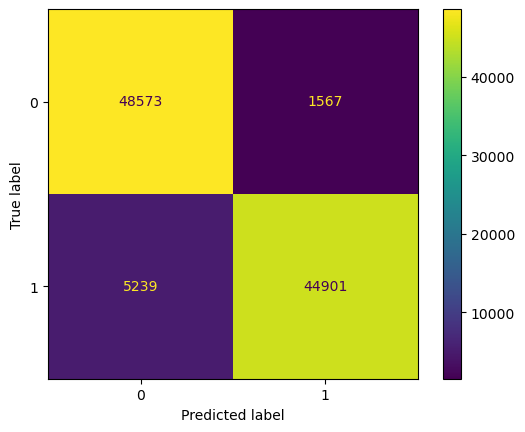

In [56]:
ConfusionMatrixDisplay.from_predictions(y_smote,logitsmote_predict)

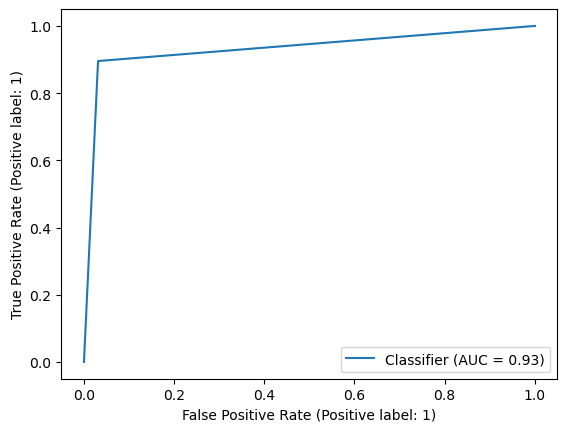

In [57]:
RocCurveDisplay.from_predictions(y_smote,logitsmote_predict)

In [58]:
print(classification_report(y_smote,logitsmote_predict))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93     50140
           1       0.97      0.90      0.93     50140

    accuracy                           0.93    100280
   macro avg       0.93      0.93      0.93    100280
weighted avg       0.93      0.93      0.93    100280



In [59]:
cross_val_score(logit,X_smote,y_smote)

array([0.78684683, 0.95612286, 0.95911448, 0.96006183, 0.95756881])

In [60]:
np.mean([0.78445353, 0.95766853, 0.95816713, 0.95841643, 0.95731951])

0.9232050260000001

##### Decision Tree

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
tree=DecisionTreeClassifier(max_depth=14)

In [63]:
treemodel=tree.fit(X_smote,y_smote)

In [64]:
treemodel.score(X_smote,y_smote)

0.8988831272437176

In [65]:
treepredict=treemodel.predict(X_smote)

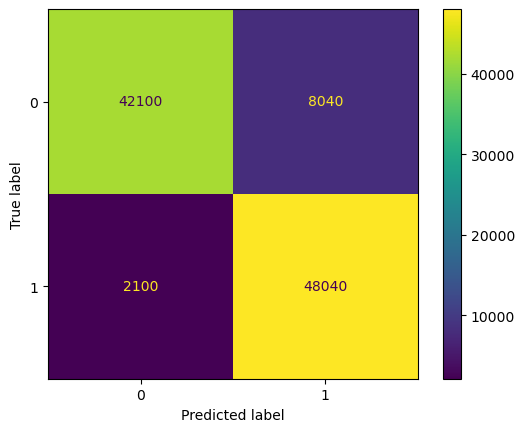

In [66]:
ConfusionMatrixDisplay.from_predictions(y_smote,treepredict)

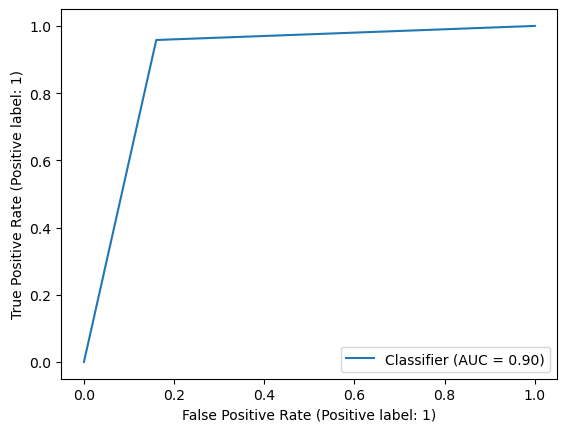

In [67]:
RocCurveDisplay.from_predictions(y_smote,treepredict)

In [68]:
print(classification_report(y_smote,treepredict))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89     50140
           1       0.86      0.96      0.90     50140

    accuracy                           0.90    100280
   macro avg       0.90      0.90      0.90    100280
weighted avg       0.90      0.90      0.90    100280



In [69]:
cross_val_score(tree,X_smote,y_smote)

array([0.82643598, 0.90202433, 0.89673913, 0.89918229, 0.90262266])

In [70]:
np.mean([0.81875748, 0.89399681, 0.89948145, 0.89464499, 0.89838452])

0.8810530499999999

##### ENSEMBLE METHODS :
        # RandomForest
        # GradientBoosting

In [71]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [72]:
RF=RandomForestClassifier(n_estimators=3000, max_depth=14)

In [73]:
RFmodel=RF.fit(X_smote,y_smote)

In [74]:
RFmodel.score(X_smote,y_smote)

0.8964499401675309

In [75]:
RFpredict=RFmodel.predict(X_smote)

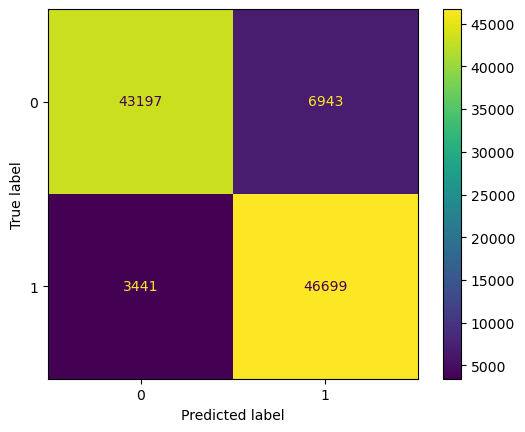

In [76]:
ConfusionMatrixDisplay.from_predictions(y_smote,RFpredict)

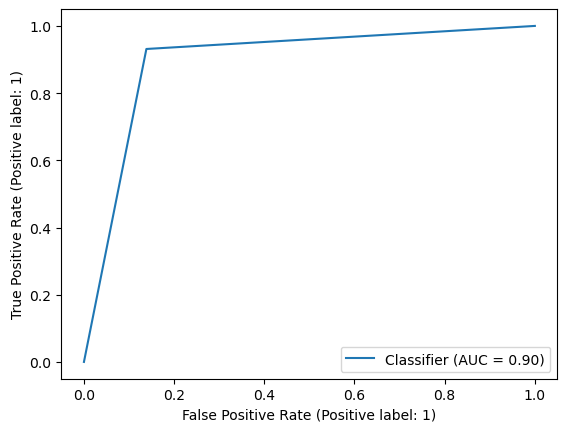

In [77]:
RocCurveDisplay.from_predictions(y_smote,RFpredict)

In [78]:
print(classification_report(y_smote,RFpredict))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89     50140
           1       0.87      0.93      0.90     50140

    accuracy                           0.90    100280
   macro avg       0.90      0.90      0.90    100280
weighted avg       0.90      0.90      0.90    100280



In [79]:
cross_val_score(RF,X_smote,y_smote)

array([0.80414838, 0.89903271, 0.8958915 , 0.89943159, 0.90381931])

In [81]:
np.mean([0.80414838, 0.89903271, 0.8958915 , 0.89943159, 0.90381931])

0.8804646979999999